In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("glass.csv")

In [3]:
data.sample(5)
len(data)

214

<AxesSubplot: xlabel='RI', ylabel='Na'>

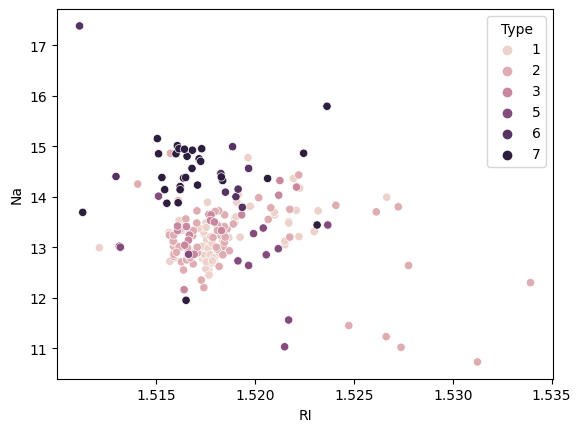

In [4]:
sns.scatterplot(x='RI', y='Na', data=data, hue='Type')

In [5]:
# x = data.loc[data['Type']==1].values
data = data.loc[data['Type']<=2]
data

# iris_data.loc[iris_data["Species"]=="Iris-setosa"]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
141,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17,2
142,1.51662,12.85,3.51,1.44,73.01,0.68,8.23,0.06,0.25,2
143,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
144,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2


In [6]:
x = data[['RI','Na']].values
x

array([[ 1.52101, 13.64   ],
       [ 1.51761, 13.89   ],
       [ 1.51618, 13.53   ],
       [ 1.51766, 13.21   ],
       [ 1.51742, 13.27   ],
       [ 1.51596, 12.79   ],
       [ 1.51743, 13.3    ],
       [ 1.51756, 13.15   ],
       [ 1.51918, 14.04   ],
       [ 1.51755, 13.     ],
       [ 1.51571, 12.72   ],
       [ 1.51763, 12.8    ],
       [ 1.51589, 12.88   ],
       [ 1.51748, 12.86   ],
       [ 1.51763, 12.61   ],
       [ 1.51761, 12.81   ],
       [ 1.51784, 12.68   ],
       [ 1.52196, 14.36   ],
       [ 1.51911, 13.9    ],
       [ 1.51735, 13.02   ],
       [ 1.5175 , 12.82   ],
       [ 1.51966, 14.77   ],
       [ 1.51736, 12.78   ],
       [ 1.51751, 12.81   ],
       [ 1.5172 , 13.38   ],
       [ 1.51764, 12.98   ],
       [ 1.51793, 13.21   ],
       [ 1.51721, 12.87   ],
       [ 1.51768, 12.56   ],
       [ 1.51784, 13.08   ],
       [ 1.51768, 12.65   ],
       [ 1.51747, 12.84   ],
       [ 1.51775, 12.85   ],
       [ 1.51753, 12.57   ],
       [ 1.517

In [7]:
y = data['Type'].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

<AxesSubplot: xlabel='RI', ylabel='Na'>

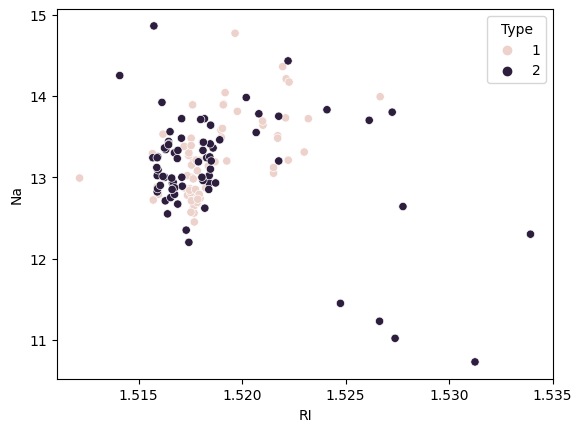

In [8]:
sns.scatterplot(x='RI', y='Na', data=data, hue='Type')

In [9]:
print(len(x))
print(len(x[0]))

146
2


In [10]:
# predicts knn for only one value
def KNN(x_test, k):
    dist = list()
    a = []
    for i in range(len(x)):
        distance = 0
        for j in range(len(x[0])):
            distance = distance + (x[i][j] - x_test[j])**2
        np.sqrt(distance)
        
        dist.append(distance)
#         print(distance, i)
        a.append(i)
    
    dist = np.array(dist)
    a = np.array(a)
    
#     print(dist)
#     print(a)
    
    mini = dist.argsort()
#     a = dist[mini]
    a = a[mini]
    
    k_neighbours = a[:k]
    
#     print(k_neighbours)
    
    classes = []
    
    classes = y[k_neighbours]
    
    print(classes)

    classes = classes.tolist()
        
    y_pred = max( set(classes), key=classes.count )
    
    return y_pred
        

In [11]:
x_test = [1.5, 14.2]
k = 3

print(x_test[0])

1.5


In [12]:
y_pred = KNN(x_test, k)
print(y_pred)

[1 1 1]
1
